In [4]:
import pyfeyn2
from feynml import *
# import renders
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.all import AllRender
from pyfeyn2.render.text.ascii import ASCIIRender
from pyfeyn2.render.text.unicode import UnicodeRender
# auto
from pyfeyn2.auto.position import  auto_align_legs, scale_positions
from pyfeyn2.auto.position import feynman_adjust_points
from pyfeyn2.auto.label import auto_label
from pyfeyn2.auto.position import auto_align_legs,auto_grid
from pyfeyn2.auto.position import auto_vdw,auto_grid
from pyfeyn2.auto.bend import auto_bend
# util
import numpy as np
from xsdata.formats.dataclass.parsers import XmlParser
from pyqgraf import qgraf, model
from feynml.interface.qgraf import style


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


/home/apn/.cache/pypoetry/virtualenvs/pyfeyn2-rvdu2REa-py3.11/lib/python3.11/site-packages/feynml/pdgid.py:111: UserWarning: Type remnant is not consistent with pdgid 2, which is fermion. Using remnant now.
  warnings.warn(
/home/apn/.cache/pypoetry/virtualenvs/pyfeyn2-rvdu2REa-py3.11/lib/python3.11/site-packages/feynml/pdgid.py:111: UserWarning: Type remnant is not consistent with pdgid -2, which is anti fermion. Using remnant now.
  warnings.warn(


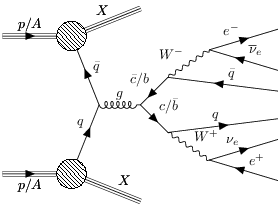

In [24]:
fd = FeynmanDiagram().add(
    v1 := Vertex().with_xy(7,0),
    v2 := Vertex().with_xy(10,0),
    v3 := Vertex().with_xy(5,+5).with_shape('blob'),
    v4 := Vertex().with_xy(5,-5).with_shape('blob'),
    Propagator(pdgid=21).connect(v1,v2).with_color('black'),
    Propagator(pdgid=-2,label="$\\bar{q}$").connect(v3,v1).with_color('black'),
    Propagator(pdgid=2,label="$q$").connect(v4,v1).with_color('black'),
    Leg(pdgid=2212,label="$p/A$",target=v3,sense='incoming').with_xy(0,5),
    Leg(pdgid=2212,label="$p/A$",target=v4).with_incoming().with_xy(0,-5).with_style("label-side: right"),
    v5 := Vertex().with_xy(12,2),
    v6 := Vertex().with_xy(15,4),
    Propagator(pdgid=-4,label="$\\bar{c}/b$").connect(v2,v5).with_color('black'),
    Propagator(pdgid=-24).connect(v5,v6),
    Leg(pdgid=11,sense='outgoing').with_target(v6).with_xy(20,5.5).with_color('black'),
    Leg(pdgid=-12,sense='outgoing').with_target(v6).with_xy(20,2.5),
    Leg(pdgid=-3,sense='outgoing',label="$\\bar{q}$").with_target(v5).with_xy(20,1),

    v7 := Vertex().with_xy(12,-2),
    v8 := Vertex().with_xy(15,-4),
    Propagator(pdgid=4,label="$c/\\bar{b}$").connect(v2,v7).with_color('black'),
    Propagator(pdgid=24).connect(v7,v8),
    Leg(pdgid=-11,sense='outgoing').with_target(v8).with_xy(20,-5.5).with_color('black'),
    Leg(pdgid=12,sense='outgoing').with_target(v8).with_xy(20,-2.5),
    Leg(pdgid=3,sense='outgoing',label="$q$").with_target(v7).with_xy(20,-1),
    
    Leg(pdgid=2,type="remnant",label="$X$",sense='outgoing').with_target(v3).with_xy(10,+7),
    Leg(pdgid=-2,type="remnant",label="$X$").with_target(v4).with_outgoing().with_xy(10,-7),
)
scale_positions(fd,0.35)
fd.render(auto_position=False,render="tikz",file="hvq")

/home/apn/.cache/pypoetry/virtualenvs/pyfeyn2-rvdu2REa-py3.11/lib/python3.11/site-packages/feynml/pdgid.py:111: UserWarning: Type remnant is not consistent with pdgid 2, which is fermion. Using remnant now.
  warnings.warn(
/home/apn/.cache/pypoetry/virtualenvs/pyfeyn2-rvdu2REa-py3.11/lib/python3.11/site-packages/feynml/pdgid.py:111: UserWarning: Type remnant is not consistent with pdgid -2, which is anti fermion. Using remnant now.
  warnings.warn(


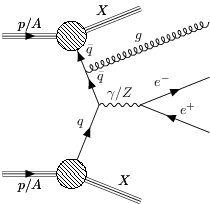

In [27]:
fd = FeynmanDiagram().add(
    v1 := Vertex().with_xy(7,0),
    vh := Vertex().with_xy(6,2.5),
    v2 := Vertex().with_xy(10,0),
    v3 := Vertex().with_xy(5,+5).with_shape('blob'),
    v4 := Vertex().with_xy(5,-5).with_shape('blob'),
    Propagator(pdgid=22,label="$\\gamma/Z$").connect(v1,v2).with_color('black'),
    Propagator(pdgid=-2,label="$\\bar{q}$").connect(vh,v1).with_color('black'),
    Propagator(pdgid=-2,label="$\\bar{q}$").connect(v3,vh).with_color('black'),
    Propagator(pdgid=2,label="$q$").connect(v4,v1).with_color('black'),
    Leg(pdgid=2212,label="$p/A$",target=v3,sense='incoming').with_xy(0,5),
    Leg(pdgid=2212,label="$p/A$",target=v4).with_incoming().with_xy(0,-5).with_style("label-side: right"),

    
    Leg(pdgid=21,target=vh,sense='outgoing').with_xy(15,6).with_color('black'),
    Leg(pdgid=2,type="remnant",label="$X$",sense='outgoing').with_target(v3).with_xy(10,+7),
    Leg(pdgid=-2,type="remnant",label="$X$").with_target(v4).with_outgoing().with_xy(10,-7),
    Leg(pdgid=11,sense='outgoing').with_target(v2).with_xy(15,2).with_color('black'),
    Leg(pdgid=-11).with_target(v2).with_outgoing().with_xy(15,-2).with_color('black'),
)
scale_positions(fd,0.35)
fd.render(auto_position=False,render="tikz",file="Zj")

/home/apn/.cache/pypoetry/virtualenvs/pyfeyn2-rvdu2REa-py3.11/lib/python3.11/site-packages/feynml/pdgid.py:111: UserWarning: Type remnant is not consistent with pdgid -2, which is anti fermion. Using remnant now.
  warnings.warn(


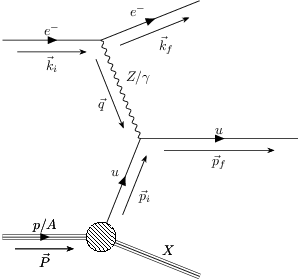

In [25]:
fd = FeynmanDiagram().add(
    v1 := Vertex().with_xy(7,0),
    v2 := Vertex().with_xy(10,0),
    v3 := Vertex().with_xy(5,+5),
    v4 := Vertex().with_xy(5,-5).with_shape('blob'),
    #Propagator(pdgid=2).connect(v1,v2).with_color('red'),
    Propagator(pdgid=22,label="$Z/\\gamma$").connect(v3,v1).with_color('red').with_style("label-side: left").with_momentum(Momentum(name="$\\vec q$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    Propagator(pdgid=2).connect(v4,v1).with_color('red').with_momentum(Momentum(name="$\\vec p_i$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    Leg(pdgid=11,target=v3,sense='incoming').with_xy(0,5).with_style("label-side: left").with_momentum(Momentum(name="$\\vec k_i$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    Leg(pdgid=2212,label="$p/A$",target=v4).with_incoming().with_xy(0,-5).with_style("label-side: right").with_style("label-side: left").with_momentum(Momentum(name="$\\vec P$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),

    Leg(pdgid=11,sense='outgoing').with_target(v3).with_xy(10,+7).with_style("label-side: right").with_momentum(Momentum(name="$\\vec k_f$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    Leg(pdgid=-2,type="remnant",label="$X$").with_target(v4).with_outgoing().with_xy(10,-7),
    Leg(pdgid=2,sense='outgoing').with_target(v1).with_xy(15,0).with_color('red').with_momentum(Momentum(name="$\\vec p_f$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    #Leg(pdgid=-11).with_target(v2).with_outgoing().with_xy(15,-2).with_color('blue'),
)
scale_positions(fd,0.5)
fd.render(auto_position=False,render="tikz",file="DISNC")

/home/apn/.cache/pypoetry/virtualenvs/pyfeyn2-rvdu2REa-py3.11/lib/python3.11/site-packages/feynml/pdgid.py:111: UserWarning: Type remnant is not consistent with pdgid -2, which is anti fermion. Using remnant now.
  warnings.warn(


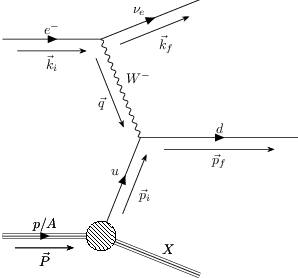

In [26]:
fd = FeynmanDiagram().add(
    v1 := Vertex().with_xy(7,0),
    v2 := Vertex().with_xy(10,0),
    v3 := Vertex().with_xy(5,+5),
    v4 := Vertex().with_xy(5,-5).with_shape('blob'),
    #Propagator(pdgid=2).connect(v1,v2).with_color('red'),
    Propagator(pdgid=-24).connect(v3,v1).with_color('red').with_style("label-side: left").with_momentum(Momentum(name="$\\vec q$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    Propagator(pdgid=2).connect(v4,v1).with_color('red').with_momentum(Momentum(name="$\\vec p_i$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    Leg(pdgid=11,target=v3,sense='incoming').with_xy(0,5).with_style("label-side: left").with_momentum(Momentum(name="$\\vec k_i$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    Leg(pdgid=2212,label="$p/A$",target=v4).with_incoming().with_xy(0,-5).with_style("label-side: right").with_style("label-side: left").with_momentum(Momentum(name="$\\vec P$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),

    Leg(pdgid=12,sense='outgoing').with_target(v3).with_xy(10,+7).with_style("label-side: right").with_momentum(Momentum(name="$\\vec k_f$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    Leg(pdgid=-2,type="remnant",label="$X$").with_target(v4).with_outgoing().with_xy(10,-7),
    Leg(pdgid=1,sense='outgoing').with_target(v1).with_xy(15,0).with_color('red').with_momentum(Momentum(name="$\\vec p_f$")).with_style("momentum-arrow : true; momentum-arrow-sense : -1"),
    #Leg(pdgid=-11).with_target(v2).with_outgoing().with_xy(15,-2).with_color('blue'),
)
scale_positions(fd,0.5)
fd.render(auto_position=False,render="tikz",file="DISCC")

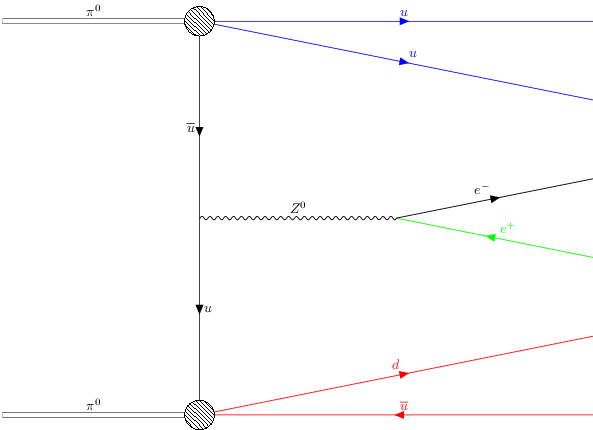

In [5]:
fd = FeynmanDiagram().add(
    v1 := Vertex().with_xy(5,0),
    v2 := Vertex().with_xy(10,0),
    v3 := Vertex().with_xy(5,+5).with_shape('blob'),
    v4 := Vertex().with_xy(5,-5).with_shape('blob'),
    Propagator(pdgid=23).connect(v1,v2),
    Propagator(pdgid=-2).connect(v1,v3),
    Propagator(pdgid=2).connect(v1,v4),
    Leg(pdgid=111,target=v3,sense='incoming').with_xy(0,5),
    Leg(pdgid=111,target=v4).with_incoming().with_xy(0,-5),
    Leg(pdgid=11,sense='outgoing').with_target(v2).with_xy(15,1),
    Leg(pdgid=-11).with_target(v2).with_outgoing().with_xy(15,-1).with_color('green'),
    Leg(pdgid=2,sense='outgoing').with_target(v3).with_xy(15,+5).with_color('blue'),
    Leg(pdgid=2,sense='outgoing').with_target(v3).with_xy(15,+3).with_color('blue'),
    Leg(pdgid=-2).with_target(v4).with_outgoing().with_xy(15,-5).with_color('red'),
    Leg(pdgid=1).with_target(v4).with_outgoing().with_xy(15,-3).with_color('red'),
)
fd.render(auto_position=False,render="tikz")